# Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
#from tensorflow.keras.datasets import mnist
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score

In [2]:
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv", header=None)
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv", header=None)

In [3]:
df1 = df_abn
df2 = df_n

# Perform EDA

In [4]:
df_abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [5]:
df_abn

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_abn.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


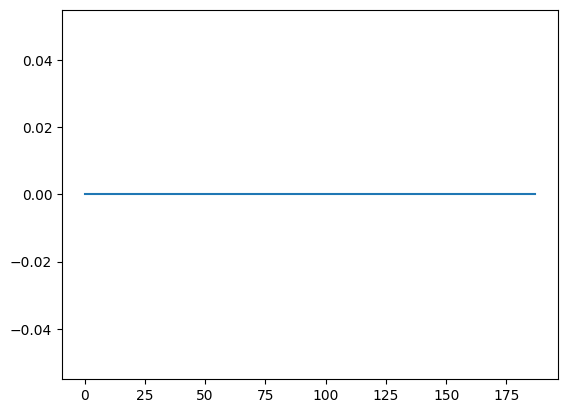

In [9]:
df_abn.isnull().sum().plot().legend().set_visible(False)

In [10]:
df_n


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [12]:
df_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


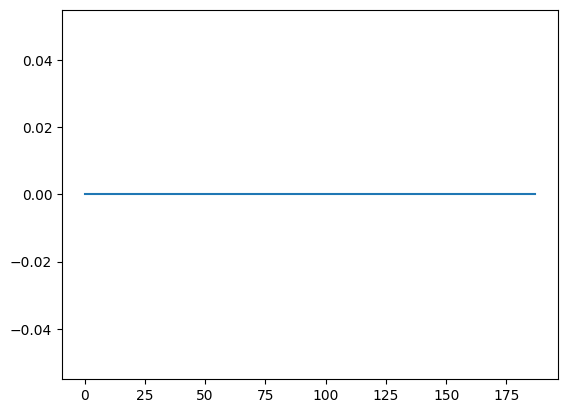

In [13]:
df_n.isnull().sum().plot().legend().set_visible(False)

In [14]:
df_abn_n = pd.concat([df_abn, df_n], axis=0)
df_abn_n

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_abn_n = df_abn_n.sample(frac=1).reset_index(drop=True)

In [16]:
df_abn_n

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.928679,0.771772,0.739489,0.744745,0.760511,0.810060,0.784535,0.735736,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.851163,1.000000,0.312558,0.074419,0.000930,0.000000,0.146047,0.180465,0.181395,0.200930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.988920,1.000000,0.947368,0.929363,0.869806,0.743767,0.601108,0.479224,0.397507,0.391967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.954421,0.981878,0.946733,0.923668,0.901702,0.861615,0.813839,0.823723,0.800659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.922755,0.896696,0.339693,0.197301,0.073523,0.021871,0.014891,0.008841,0.000000,0.005119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.979518,0.655422,0.272892,0.118675,0.104819,0.050602,0.048795,0.046988,0.016265,0.038554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.678205,0.102672,0.022685,0.062174,0.110234,0.124685,0.123173,0.129558,0.121828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,0.937349,0.798197,0.275445,0.069246,0.081776,0.115190,0.091009,0.084414,0.083535,0.083755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,0.895500,0.444500,0.401500,0.121500,0.002500,0.087000,0.151000,0.102500,0.143000,0.164500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_abn_n.iloc[:,187].unique()

array([1., 0.])

In [18]:
value_counts_train_data = df_abn_n[187].value_counts()
value_counts_train_data

187
1.0    10506
0.0     4046
Name: count, dtype: int64

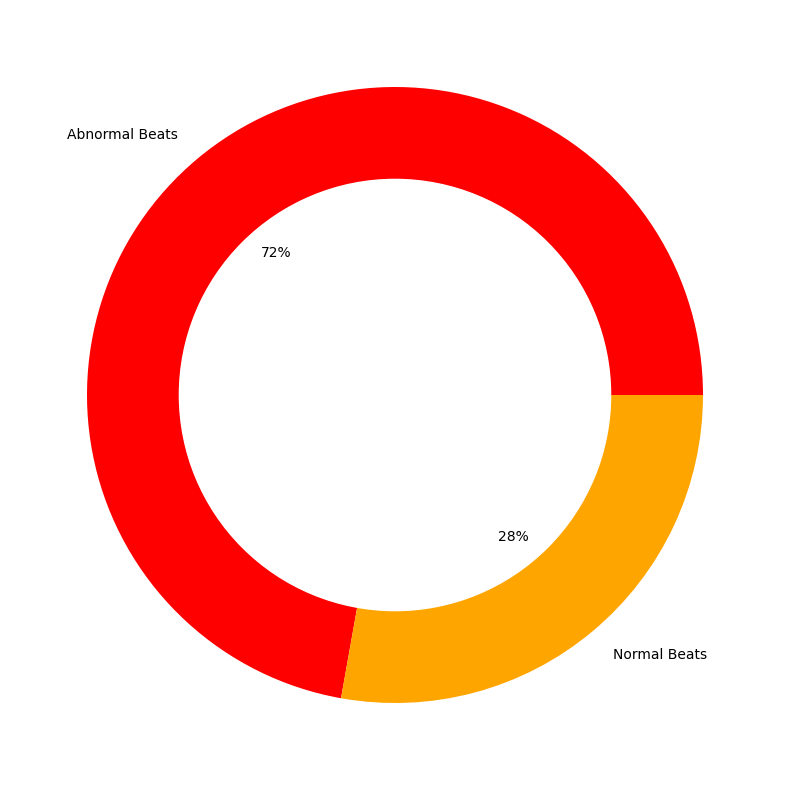

In [19]:

plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')#type: ignore
plt.pie(df_abn_n[187].value_counts(), labels=['Abnormal Beats','Normal Beats',], autopct = '%0.0f%%', 
                                colors = ['red','orange'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Apply Supervised Learning

In [20]:
X1  = df_abn_n.iloc[:,:-1]
y1 = df_abn_n.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Sampling Class

In [22]:
class Samplingdata:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def smote(self):
        smote = SMOTE(random_state=42, k_neighbors=3)#, n_jobs=-1
        X_smote, y_smote = smote.fit_resample(self.X, self.y)#type: ignore
        return X_smote, y_smote
    def tomek(self):
        tomek = TomekLinks()
        X_tomek, y_tomek = tomek.fit_resample(self.X, self.y)#type: ignore
        return X_tomek, y_tomek
    def smote_tomek(self):
        smt = SMOTETomek(random_state=42)
        X_smt, y_smt = smt.fit_resample(self.X, self.y)#type: ignore
        return X_smt, y_smt

Model Class

In [23]:
class Model:
    def __init__ (self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def model_fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    def model_report(self, y_pred, y_test):
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred, normalize='true')
        classification = classification_report(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1Score = f1_score(y_test, y_pred, average='weighted')
        return accuracy, confusion, classification, recall, precision, f1Score
    def model_pred(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

Draw_confusion

In [39]:
class ReportModel:
    def __init__(self, confusion_mat, model_name, smpl_name, model_accu, model_precision, model_recall, model_F1, model_cl_report):
        self.confusion_mat = confusion_mat
        self.model_name = model_name
        self.smpl_name = smpl_name
        self.model_accu = model_accu
        self.model_precision = model_precision
        self.model_recall = model_recall
        self.model_F1 = model_F1
        self.model_cl_report = model_cl_report
    def draw_conf(self, confusion_mat, model_name, smpl_name):
        plt.figure(figsize=(8,5))
        sns.heatmap(confusion_mat, annot=True, linewidths=0.01, fmt = '0.3f')
        plt.title(f"{model_name} {smpl_name} Confusion Matrix")
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()
    def print_report(self, model_accu, model_precision, model_recall, model_F1, model_cl_report):
        print(f"accuracy is: {model_accu}")
        print(f"Precision: {model_precision}")
        print(f"Recall: {model_recall}")
        print(f"F1_Score: {model_F1}")
        print(f"classification:\n {model_cl_report}")

Sampling X,y

In [40]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train_smote, y_train_smote = Samplingdata(X_train_smote, y_train_smote).smote()

In [41]:
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train_tomek, y_train_tomek = Samplingdata(X_train_tomek, y_train_tomek).tomek()

In [42]:
X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train_smotek, y_train_smotek = Samplingdata(X_train_smotek, y_train_smotek).smote_tomek()

Logistic Regression

In [43]:
model_logistic_reg = LogisticRegression(random_state=42, max_iter=100, multi_class='auto', solver='liblinear')

In [44]:
MyModel1 = Model(model_logistic_reg, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
MyModel1.model_fit(X_train_smote,  y_train_smote)

In [45]:
prediction1 = MyModel1.model_pred(X_test_smote)
model_accu_1, model_con_mat_1, model_cl_report_1, model_recall_1, model_precision_1, model_F1_1 = MyModel1.model_report(prediction1, y_test_smote)

In [47]:
log_reg_m1 =  ReportModel(model_con_mat_1, 'Logistic Regression', 'SMOTE', model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)

In [48]:
log_reg_m1.print_report(model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)#type: ignore


accuracy is: 0.7897629680522157
Precision: 0.8322319979152849
Recall: 0.7897629680522157
F1_Score: 0.799050144460267
classification:
               precision    recall  f1-score   support

         0.0       0.58      0.84      0.69       809
         1.0       0.93      0.77      0.84      2102

    accuracy                           0.79      2911
   macro avg       0.76      0.81      0.77      2911
weighted avg       0.83      0.79      0.80      2911



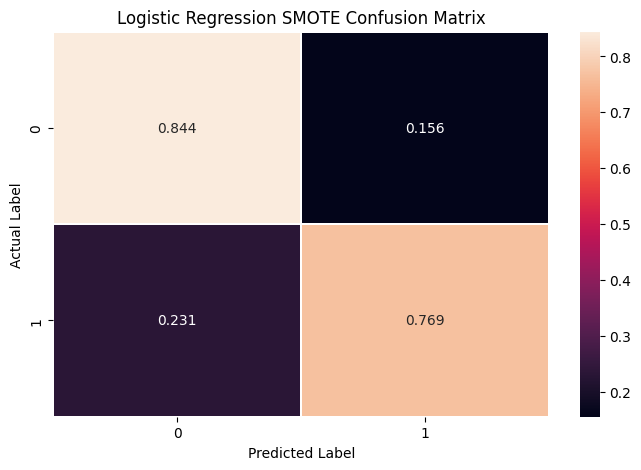

In [49]:
log_reg_m1.draw_conf(model_con_mat_1, 'Logistic Regression', 'SMOTE')

In [50]:
Model2 = Model(model_logistic_reg, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model2.model_fit(X_train_smotek, y_train_smotek)

In [51]:
prediction2 = Model2.model_pred(X_test_smotek)
model_accu_2, model_con_mat_2, model_cl_report_2, model_recall_2, model_precision_2, model_F1_2 = Model2.model_report(prediction2, y_test_smotek)

In [52]:
log_reg_m2 = ReportModel(model_con_mat_2, 'Logistic Regression', 'SMOTE_TOMEK', model_accu_2, model_precision_2, model_recall_2, model_F1_2, model_cl_report_2)

In [53]:
log_reg_m2.print_report(model_accu_2, model_precision_2, model_recall_2, model_F1_2, model_cl_report_2)#type: ignore

accuracy is: 0.788388869804191
Precision: 0.8315580927981738
Recall: 0.788388869804191
F1_Score: 0.7977908802606026
classification:
               precision    recall  f1-score   support

         0.0       0.58      0.84      0.69       809
         1.0       0.93      0.77      0.84      2102

    accuracy                           0.79      2911
   macro avg       0.75      0.81      0.76      2911
weighted avg       0.83      0.79      0.80      2911



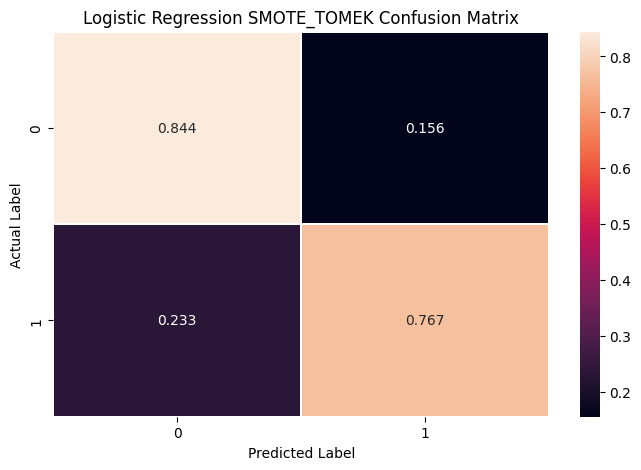

In [54]:
log_reg_m2.draw_conf(model_con_mat_2, 'Logistic Regression', 'SMOTE_TOMEK')

Decision Tree

In [55]:
model_decision_tree = DecisionTreeClassifier(random_state=0)

In [56]:
Model3 = Model(model_decision_tree, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model3.model_fit(X_train_smotek,  y_train_smotek)

In [57]:
prediction3 = Model3.model_pred(X_test_smotek)
model_accu_3, model_con_mat_3, model_cl_report_3, model_recall_3, model_precision_3, model_F1_3 = Model3.model_report(prediction3, y_test_smotek)

In [58]:
DT_m3 = ReportModel(model_con_mat_3, 'Decision Tree', 'SMOTE_TOMEK', model_accu_3, model_precision_3, model_recall_3, model_F1_3, model_cl_report_3)

In [59]:
DT_m3.print_report(model_accu_3, model_precision_3, model_recall_3, model_F1_3, model_cl_report_3)#type: ignore

accuracy is: 0.9223634489866025
Precision: 0.9242849311828879
Recall: 0.9223634489866025
F1_Score: 0.9230335284171082
classification:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       809
         1.0       0.96      0.93      0.95      2102

    accuracy                           0.92      2911
   macro avg       0.90      0.91      0.90      2911
weighted avg       0.92      0.92      0.92      2911



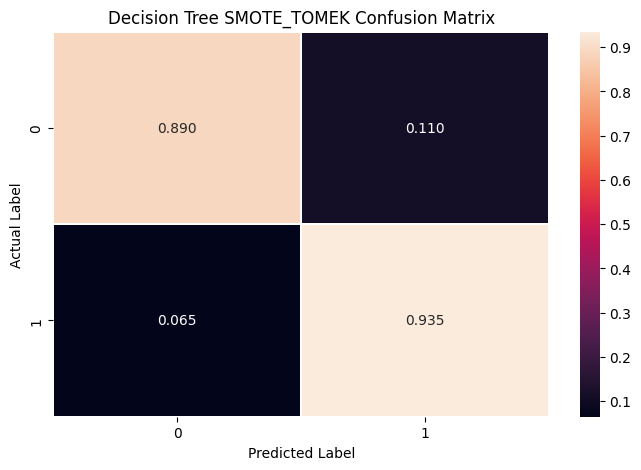

In [60]:
DT_m3.draw_conf(model_con_mat_3, 'Decision Tree', 'SMOTE_TOMEK')

k-nearest

In [61]:
model_k_nearest = KNeighborsClassifier(n_jobs=-1)

In [62]:
Model4 = Model(model_k_nearest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model4.model_fit(X_train_smotek, y_train_smotek)

In [63]:
prediction4 = Model4.model_pred(X_test_smotek)
model_accu_4, model_con_mat_4, model_cl_report_4, model_recall_4, model_precision_4, model_F1_4 = Model4.model_report(prediction4, y_test_smotek)

In [64]:
knn_m4 = ReportModel(model_con_mat_4, 'Logistic Regression', 'SMOTE', model_accu_1, model_precision_1, model_recall_1, model_F1_1, model_cl_report_1)

In [65]:
knn_m4.print_report(model_accu_4, model_precision_4, model_recall_4, model_F1_4, model_cl_report_4)#type: ignore

accuracy is: 0.9137753349364479
Precision: 0.9278848111126585
Recall: 0.9137753349364479
F1_Score: 0.9163351720098891
classification:
               precision    recall  f1-score   support

         0.0       0.78      0.97      0.86       809
         1.0       0.99      0.89      0.94      2102

    accuracy                           0.91      2911
   macro avg       0.88      0.93      0.90      2911
weighted avg       0.93      0.91      0.92      2911



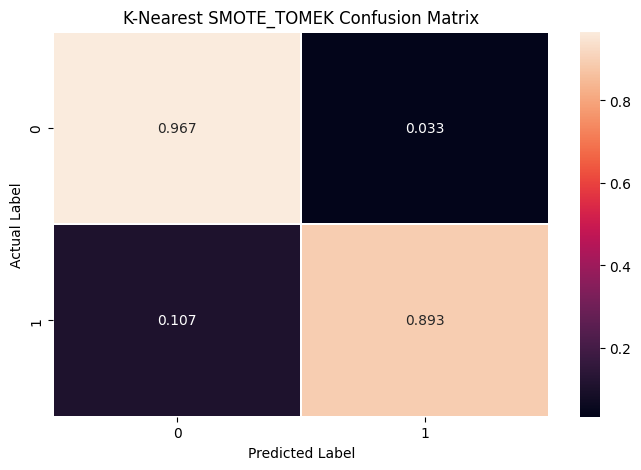

In [66]:
knn_m4.draw_conf(model_con_mat_4, 'K-Nearest', 'SMOTE_TOMEK')

Linear SVC

In [67]:
model_linear_svc = LinearSVC(random_state=42, max_iter=5000, dual = True)

In [68]:
Model5 = Model(model_linear_svc, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model5.model_fit(X_train_smotek, y_train_smotek)

In [69]:
prediction5 = Model5.model_pred(X_test_smotek)
model_accu_5, model_con_mat_5, model_cl_report_5, model_recall_5, model_precision_5, model_F1_5 = Model5.model_report(prediction5, y_test_smotek)

In [70]:
linear_svc_m5 = ReportModel(model_con_mat_5, 'Linear SVC', 'SMOTE_TOMEK', model_accu_5, model_precision_5, model_recall_5, model_F1_5, model_cl_report_5)

In [71]:
linear_svc_m5.print_report(model_accu_5, model_precision_5, model_recall_5, model_F1_5, model_cl_report_5)#type: ignore

accuracy is: 0.7925111645482652
Precision: 0.8335896056154579
Recall: 0.7925111645482652
F1_Score: 0.8015679590863191
classification:
               precision    recall  f1-score   support

         0.0       0.59      0.84      0.69       809
         1.0       0.93      0.77      0.84      2102

    accuracy                           0.79      2911
   macro avg       0.76      0.81      0.77      2911
weighted avg       0.83      0.79      0.80      2911



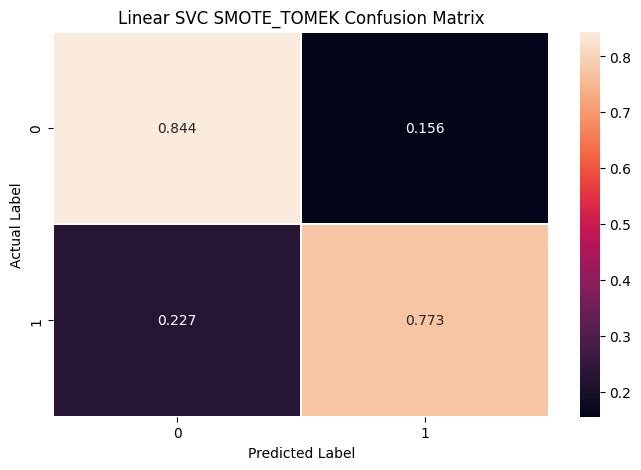

In [72]:
linear_svc_m5.draw_conf(model_con_mat_5, 'Linear SVC', 'SMOTE_TOMEK')

SVM

In [73]:
model_SVM = SVC(random_state=42)

In [74]:
Model6 = Model(model_SVM, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model6.model_fit(X_train_smotek, y_train_smotek)

In [75]:
prediction6 = Model6.model_pred(X_test_smotek)
model_accu_6, model_con_mat_6, model_cl_report_6, model_recall_6, model_precision_6, model_F1_6 = Model6.model_report(prediction6, y_test_smotek)

In [76]:
SVM_m6 = ReportModel(model_con_mat_6, 'SVM', 'SMOTE_TOMEK', model_accu_6, model_precision_6, model_recall_6, model_F1_6, model_cl_report_6)

In [77]:
SVM_m6.print_report(model_accu_6, model_precision_6, model_recall_6, model_F1_6, model_cl_report_6)#type: ignore

accuracy is: 0.8979732050841636
Precision: 0.913474406756601
Recall: 0.8979732050841636
F1_Score: 0.9010717534716448
classification:
               precision    recall  f1-score   support

         0.0       0.75      0.94      0.84       809
         1.0       0.98      0.88      0.93      2102

    accuracy                           0.90      2911
   macro avg       0.86      0.91      0.88      2911
weighted avg       0.91      0.90      0.90      2911



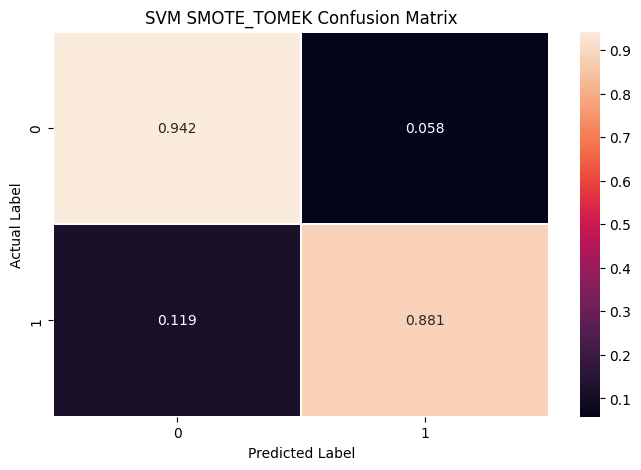

In [78]:
SVM_m6.draw_conf(model_con_mat_6, 'SVM', 'SMOTE_TOMEK')

# Apply Unsupervised Learning

In [79]:
df_features = df_abn_n.iloc[:,:-1]
df_classes = df_abn_n.iloc[:,-1]

In [80]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 20.8 MB


In [81]:
df_classes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14552 entries, 0 to 14551
Series name: 187
Non-Null Count  Dtype  
--------------  -----  
14552 non-null  float64
dtypes: float64(1)
memory usage: 113.8 KB


K-Means

In [82]:
kmeans = KMeans(n_clusters=2, random_state=42, init = 'k-means++')

In [83]:
classes = kmeans.fit_predict(df_features)

In [84]:
pca = PCA(n_components=2, random_state=42)

In [85]:
reduce_features = pca.fit_transform(df_features)

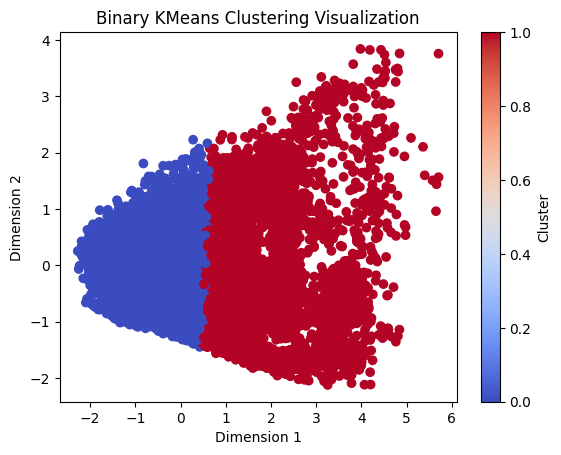

In [86]:
plt.scatter(reduce_features[:, 0], reduce_features[:, 1], c=classes, cmap='coolwarm')
plt.title('Binary KMeans Clustering Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [87]:
silhouette_avg = silhouette_score(df_features, classes)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.29634994614652393


# Ensemble

Random Forest

In [88]:
model_random_forest = RandomForestClassifier(random_state=42)

In [89]:
Model7 = Model(model_random_forest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model7.model_fit(X_train_smotek, y_train_smotek)

In [90]:
prediction7 = Model7.model_pred(X_test_smotek)
model_accu_7, model_con_mat_7, model_cl_report_7, model_recall_7, model_precision_7, model_F1_7 = Model7.model_report(prediction7, y_test_smotek)

In [91]:
randm_m7 = ReportModel(model_con_mat_7, 'Random Forest', 'SMOTE_TOMEK', model_accu_7, model_precision_7, model_recall_7, model_F1_7, model_cl_report_7)

In [92]:
randm_m7.print_report(model_accu_7, model_precision_7, model_recall_7, model_F1_7, model_cl_report_7)#type: ignore

accuracy is: 0.9711439367914806
Precision: 0.9711669509805919
Recall: 0.9711439367914806
F1_Score: 0.9711548819550425
classification:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       809
         1.0       0.98      0.98      0.98      2102

    accuracy                           0.97      2911
   macro avg       0.96      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



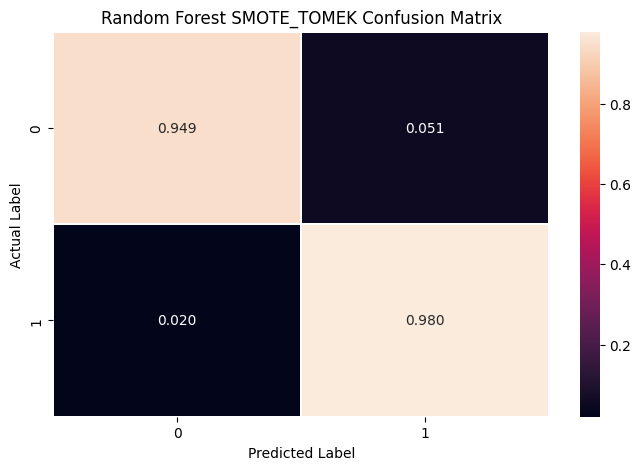

In [93]:
randm_m7.draw_conf(model_con_mat_7, 'Random Forest', 'SMOTE_TOMEK')

XGboost

In [94]:
model_xgboost = xgb.XGBClassifier()
Model8 = Model(model_xgboost, X_train, X_test, y_train, y_test)

In [95]:
Model8.model_fit(X_train, y_train)

In [96]:
predict_xgboost = Model8.model_pred(X_test)
accu_xgboost, con_mat_xgboost, cl_report_xgboost, recall_xgboost, precision_xgboost, F1_score_xgboost = Model8.model_report(predict_xgboost, y_test)

In [97]:
xgboost_m8 = ReportModel(con_mat_xgboost, 'XGBoost', 'Original', accu_xgboost, precision_xgboost, recall_xgboost, F1_score_xgboost, cl_report_xgboost)

In [98]:
xgboost_m8.print_report(accu_xgboost, precision_xgboost, recall_xgboost, F1_score_xgboost, cl_report_xgboost)#type: ignore

accuracy is: 0.9783579525936105
Precision: 0.9783525812545547
Recall: 0.9783579525936105
F1_Score: 0.9782520238941813
classification:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       843
         1.0       0.98      0.99      0.98      2068

    accuracy                           0.98      2911
   macro avg       0.98      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



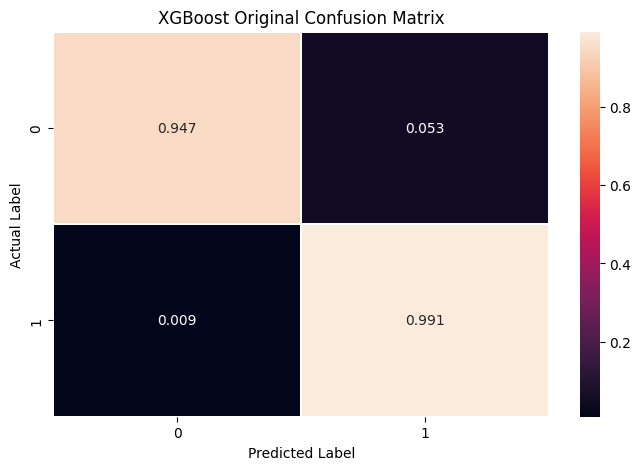

In [99]:
xgboost_m8.draw_conf(con_mat_xgboost, 'XGBoost', 'Original')